# Определение перспективного тарифа для телеком-компании

## Описание проекта

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В данной работе предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. По предоставленным данным нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Обзор данных

In [33]:
import pandas as pd     #  импорт библиотек
import numpy as np
from scipy import stats as st
from functools import reduce

In [34]:
#  прочтение данных
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Просмотрим информацию о каждой таблице в отдельности:

In [35]:
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [36]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [37]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [38]:
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Удалим столбец `Unnamed: 0`:

In [39]:
del internet['Unnamed: 0']
display(internet.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [40]:
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


## Подготовка данных

1) Изменим в таблицах **users**, **calls**, **messages** и **internet** в столбцах с датой тип данных на `datetime`:

In [41]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
#users.info()

In [42]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#calls.info()

In [43]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#messages.info()

In [44]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#internet.info()

2) округлим длительность каждого звонка вверх:

In [45]:
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


3) добавим в таблицу **calls** столбец `month`:

In [46]:
calls['month'] = calls['call_date'].dt.month_name()
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


4) сгруппируем данные таблицы **calls** по `user_id` и `month` и подсчитем общую продолжительность разговоров и их количество по месяцам для каждого пользователя:

In [47]:
calls_grouped = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_grouped.columns = ['sum_duration', 'number_of_calls']
calls_grouped.head(10)

sum_duration  number_of_calls
user_id month                                   
1000    August              408               52
        December            333               46
        July                340               47
        June                172               43
        May                 159               22
        November            338               43
        October             350               57
        September           466               58
1001    December            414               63
        November            430               59

5) добавим в таблицу **messages** столбец `month`:

In [48]:
messages['month'] = messages['message_date'].dt.month_name()
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


6) сгруппируем данные таблицы **messages** по `user_id` и `month` и подсчитем количество отправленных сообщений по месяцам для каждого пользователя:

In [49]:
messages_grouped = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_grouped.columns = ['number_of_messages']
messages_grouped.head(10)

number_of_messages
user_id month                        
1000    August                     81
        December                   70
        July                       75
        June                       60
        May                        22
        November                   58
        October                    73
        September                  57
1002    August                     13
        December                   12

7) добавим в таблицу **internet** столбец `month`:

In [50]:
internet['month'] = internet['session_date'].dt.month_name()
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,November
1,1000_1,1052.81,2018-09-07,1000,September
2,1000_2,1197.26,2018-06-25,1000,June
3,1000_3,550.27,2018-08-22,1000,August
4,1000_4,302.56,2018-09-24,1000,September


8) сгруппируем данные таблицы **internet** по `user_id` и `month` и подсчитем объем израсходованного интернет-трафика по месяцам для каждого пользователя:

In [51]:
internet_grouped = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_grouped.head(10)

mb_used
user_id month              
1000    August     14055.93
        December    9817.61
        July       14003.64
        June       23233.77
        May         2253.49
        November   14756.47
        October    14702.49
        September  14568.91
1001    December   14036.66
        November   18429.34

Переведем мегабайты в гигабайты и округлим значения в большую сторону:

In [52]:
internet_grouped['mb_used'] = np.ceil(internet_grouped['mb_used'] / 1024).astype('int')
internet_grouped.columns = ['gb_used']
internet_grouped.head(10)

gb_used
user_id month             
1000    August          14
        December        10
        July            14
        June            23
        May              3
        November        15
        October         15
        September       15
1001    December        14
        November        18

9) объединим таблицы **calls_grouped**, **messages_grouped** и **internet_grouped**:

In [64]:
data_frames = [calls_grouped, messages_grouped, internet_grouped]
revenue = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='left'), data_frames)
display(revenue.head(10))
revenue.info()

sum_duration  number_of_calls  number_of_messages  gb_used
user_id month                                                                
1000    August              408               52                81.0     14.0
        December            333               46                70.0     10.0
        July                340               47                75.0     14.0
        June                172               43                60.0     23.0
        May                 159               22                22.0      3.0
        November            338               43                58.0     15.0
        October             350               57                73.0     15.0
        September           466               58                57.0     15.0
1001    December            414               63                 NaN     14.0
        November            430               59                 NaN     18.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 'August') to (1499, 'September')
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sum_duration        3174 non-null   int64  
 1   number_of_calls     3174 non-null   int64  
 2   number_of_messages  2678 non-null   float64
 3   gb_used             3163 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 129.0+ KB


В объединенной таблице пропуски в столбцах `number_of_messages` и `gb_used`, так как пользователь мог не отправлять sms или не использовать мобильный интернет в какой-то из месяцов. Заполним эти пропуски нулями:

In [65]:
revenue['number_of_messages'] = revenue['number_of_messages'].fillna(0).astype('int')
revenue['gb_used'] = revenue['gb_used'].fillna(0).astype('int')
revenue = revenue.reset_index()
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3174 non-null   int64 
 1   month               3174 non-null   object
 2   sum_duration        3174 non-null   int64 
 3   number_of_calls     3174 non-null   int64 
 4   number_of_messages  3174 non-null   int64 
 5   gb_used             3174 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 148.9+ KB


Создадим датафрейм с идентификатор пользователя и его тарифом:

In [66]:
users_tariff = users[['user_id', 'tariff']]
users_tariff.columns=['user_id', 'tariff_name']
users_tariff = users_tariff.drop_duplicates().reset_index(drop=True)
users_tariff.head()

,user_id,tariff_name
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


Объединим датафреймы **revenue** и **users_tariff**:

In [67]:
revenue = revenue.merge(users_tariff, on='user_id', how='left')
revenue.head()

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name
0,1000,August,408,52,81,14,ultra
1,1000,December,333,46,70,10,ultra
2,1000,July,340,47,75,14,ultra
3,1000,June,172,43,60,23,ultra
4,1000,May,159,22,22,3,ultra


Для удобства дальнейших расчетов объединим датафреймы **revenue** и **tariffs**: 

In [68]:
revenue = revenue.merge(tariffs, on='tariff_name', how='left')
revenue.head()

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408,52,81,14,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333,46,70,10,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340,47,75,14,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172,43,60,23,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159,22,22,3,ultra,1000,30720,3000,1950,150,1,1


10) рассчиаем и добавим в таблицу помесячную выручку с каждого пользователя:

In [69]:
revenue['calls_purchase'] = revenue['sum_duration'] - revenue['minutes_included']    #  вычитаем бесплатный лимит из суммарного количества звонков 
revenue.head()                                             

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_purchase
0,1000,August,408,52,81,14,ultra,1000,30720,3000,1950,150,1,1,-2592
1,1000,December,333,46,70,10,ultra,1000,30720,3000,1950,150,1,1,-2667
2,1000,July,340,47,75,14,ultra,1000,30720,3000,1950,150,1,1,-2660
3,1000,June,172,43,60,23,ultra,1000,30720,3000,1950,150,1,1,-2828
4,1000,May,159,22,22,3,ultra,1000,30720,3000,1950,150,1,1,-2841


Если лимит минут не исчерпан, то значения в столбце будут отрицательными, и дополнительная плата за звонки взыматься не будет, поэтому для верных расчетов лучше заменить эти значения на 0.

In [70]:
revenue.loc[revenue['calls_purchase'] < 0, 'calls_purchase'] = 0  
revenue.head()

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_purchase
0,1000,August,408,52,81,14,ultra,1000,30720,3000,1950,150,1,1,0
1,1000,December,333,46,70,10,ultra,1000,30720,3000,1950,150,1,1,0
2,1000,July,340,47,75,14,ultra,1000,30720,3000,1950,150,1,1,0
3,1000,June,172,43,60,23,ultra,1000,30720,3000,1950,150,1,1,0
4,1000,May,159,22,22,3,ultra,1000,30720,3000,1950,150,1,1,0


Умножим получившиеся значения на значения из тарифного плана:

In [71]:
revenue['calls_purchase'] = revenue['calls_purchase'] * revenue['rub_per_minute']

Аналогично для сообщений:

In [72]:
revenue['messages_purchase'] = revenue['number_of_messages'] - revenue['messages_included']
revenue.loc[revenue['messages_purchase'] < 0, 'messages_purchase'] = 0  
revenue['messages_purchase'] = revenue['messages_purchase'] * revenue['rub_per_message']
revenue.tail() 

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_purchase,messages_purchase
3169,1498,September,471,59,44,22,smart,50,15360,500,550,200,3,3,0,0
3170,1499,December,492,69,66,13,smart,50,15360,500,550,200,3,3,0,48
3171,1499,November,612,74,59,18,smart,50,15360,500,550,200,3,3,336,27
3172,1499,October,449,68,48,18,smart,50,15360,500,550,200,3,3,0,0
3173,1499,September,70,9,11,2,smart,50,15360,500,550,200,3,3,0,0


А так же для интернет-трафика:

In [73]:
revenue['gb_purchase'] = revenue['gb_used'] - revenue['mb_per_month_included'] / 1024
revenue.loc[revenue['gb_purchase'] < 0, 'gb_purchase'] = 0  
revenue['gb_purchase'] = revenue['gb_purchase'] * revenue['rub_per_gb']
revenue['gb_purchase'] = revenue['gb_purchase'].astype('int')
revenue.head() 

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_purchase,messages_purchase,gb_purchase
0,1000,August,408,52,81,14,ultra,1000,30720,3000,1950,150,1,1,0,0,0
1,1000,December,333,46,70,10,ultra,1000,30720,3000,1950,150,1,1,0,0,0
2,1000,July,340,47,75,14,ultra,1000,30720,3000,1950,150,1,1,0,0,0
3,1000,June,172,43,60,23,ultra,1000,30720,3000,1950,150,1,1,0,0,0
4,1000,May,159,22,22,3,ultra,1000,30720,3000,1950,150,1,1,0,0,0


Добавим столбец с итоговой помесячной выручкой с каждого пользователя:

In [74]:
revenue['total'] = revenue['calls_purchase'] + revenue['messages_purchase'] + revenue['gb_purchase'] + revenue['rub_monthly_fee']
revenue.tail()

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_purchase,messages_purchase,gb_purchase,total
3169,1498,September,471,59,44,22,smart,50,15360,500,550,200,3,3,0,0,1400,1950
3170,1499,December,492,69,66,13,smart,50,15360,500,550,200,3,3,0,48,0,598
3171,1499,November,612,74,59,18,smart,50,15360,500,550,200,3,3,336,27,600,1513
3172,1499,October,449,68,48,18,smart,50,15360,500,550,200,3,3,0,0,600,1150
3173,1499,September,70,9,11,2,smart,50,15360,500,550,200,3,3,0,0,0,550


Удалим столбцы, которые больше не понадобятся:

In [75]:
revenue = revenue.drop(labels=['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
revenue.head()

,user_id,month,sum_duration,number_of_calls,number_of_messages,gb_used,tariff_name,calls_purchase,messages_purchase,gb_purchase,total
0,1000,August,408,52,81,14,ultra,0,0,0,1950
1,1000,December,333,46,70,10,ultra,0,0,0,1950
2,1000,July,340,47,75,14,ultra,0,0,0,1950
3,1000,June,172,43,60,23,ultra,0,0,0,1950
4,1000,May,159,22,22,3,ultra,0,0,0,1950


## Анализ данных

Сравним количество минут разговора, требуемое клиентам каждого тарифа в месяц. 

Text(0.5, 0, 'Minutes')

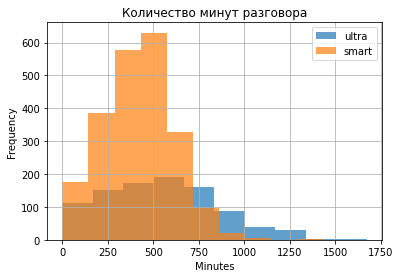

In [138]:
ultra = revenue.loc[revenue.loc[:, 'tariff_name'] == 'ultra']
ultra['sum_duration'].plot(kind='hist', alpha=0.7, grid=True, legend=True, 
                           title='Количество минут разговора', label='ultra')
smart = revenue.loc[revenue.loc[:, 'tariff_name'] == 'smart']
smart['sum_duration'].plot(kind='hist', alpha=0.7, grid=True, 
                           legend=True, label='smart').set_xlabel('Minutes')

In [139]:
print('Среднее количество минут разговора пользователей ultra:', ultra['sum_duration'].mean())
print('Среднее количество минут разговора пользователей smart:', smart['sum_duration'].mean())

Среднее количество минут разговора пользователей ultra: 545.4511041009464
Среднее количество минут разговора пользователей smart: 419.0629779577148


In [140]:
print('Дисперсия количества минут разговора пользователей ultra:', np.var(ultra['sum_duration'], ddof=1))
print('Дисперсия количества минут разговора пользователей smart:', np.var(smart['sum_duration'], ddof=1))

Дисперсия количества минут разговора пользователей ultra: 94203.41839614812
Дисперсия количества минут разговора пользователей smart: 35844.1895513438


In [141]:
print('Стандартное отклонение количества минут разговора пользователей ultra:', np.std(ultra['sum_duration'], ddof=1))
print('Стандартное отклонение количества минут разговора пользователей smart:', np.std(smart['sum_duration'], ddof=1))

Стандартное отклонение количества минут разговора пользователей ultra: 306.92575388218586
Стандартное отклонение количества минут разговора пользователей smart: 189.3256177894154


***Вывод:*** 

1) распределения для обих тарифов нормальные;

2) пользователям тарифа **smart** в среднем необходимо меньшее количество минут разговора в месяц;

3) дисперсии количества минут разговора пользователей обоих тарифов различаются;

4) пользователи **ultra** не превышают лимит минут;

5) пользователи **smart** зачастую превышают лимит минут.

Сравним количество sms, требуемое клиентам каждого тарифа в месяц.

Text(0.5, 0, 'SMS')

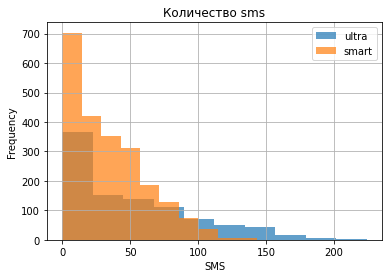

In [143]:
ultra['number_of_messages'].plot(kind='hist', alpha=0.7, grid=True, legend=True, 
                                 title='Количество sms', label='ultra')
smart['number_of_messages'].plot(kind='hist', alpha=0.7, grid=True, legend=True, 
                                 label='smart').set_xlabel('SMS')

In [144]:
print('Среднее количество sms пользователей ultra:', ultra['number_of_messages'].mean())
print('Среднее количество sms пользователей smart:', smart['number_of_messages'].mean())

Среднее количество sms пользователей ultra: 49.03364879074658
Среднее количество sms пользователей smart: 33.396311291048136


In [145]:
print('Дисперсия количества sms пользователей ultra:', np.var(ultra['number_of_messages'], ddof=1))
print('Дисперсия количества sms пользователей smart:', np.var(smart['number_of_messages'], ddof=1))

Дисперсия количества sms пользователей ultra: 2198.7336034091536
Дисперсия количества sms пользователей smart: 798.5957919678607


In [146]:
print('Стандартное отклонение количества sms пользователей ultra:', np.std(ultra['number_of_messages'], ddof=1))
print('Стандартное отклонение количества sms пользователей smart:', np.std(smart['number_of_messages'], ddof=1))

Стандартное отклонение количества sms пользователей ultra: 46.89065582191353
Стандартное отклонение количества sms пользователей smart: 28.259437219588445


***Вывод:*** 

1) у тарифов распределение количества sms - распределение Пуассона;

2) пользователям тарифа **smart** в среднем необходимо меньшее количество sms в месяц;

3) дисперсии количества sms пользователей обоих тарифов различаются;

4) пользователи **ultra** не превышают лимит sms;

5) пользователи **smart** зачастую превышают лимит sms.

Сравним объём интернет-трафика, требуемый клиентам каждого тарифа в месяц.

Text(0.5, 0, 'Gb')

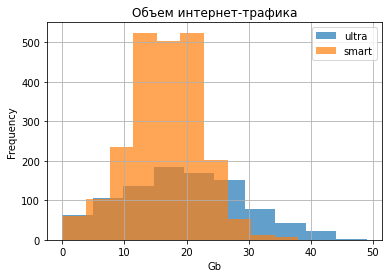

In [148]:
ultra['gb_used'].plot(kind='hist', alpha=0.7, grid=True, legend=True, 
                                 title='Объем интернет-трафика', label='ultra')
smart['gb_used'].plot(kind='hist', alpha=0.7, grid=True, legend=True, 
                                 label='smart').set_xlabel('Gb')

In [149]:
print('Средний объем интернет-трафика пользователей ultra:', ultra['gb_used'].mean())
print('Средний объем интернет-трафика пользователей smart:', smart['gb_used'].mean())

Средний объем интернет-трафика пользователей ultra: 19.487907465825447
Средний объем интернет-трафика пользователей smart: 16.32973459289249


In [150]:
print('Дисперсия объема интернет-трафика пользователей ultra:', np.var(ultra['gb_used'], ddof=1))
print('Дисперсия объема интернет-трафика пользователей smart:', np.var(smart['number_of_messages'], ddof=1))

Дисперсия объема интернет-трафика пользователей ultra: 97.82064309037578
Дисперсия объема интернет-трафика пользователей smart: 798.5957919678607


In [151]:
print('Стандартное отклонение объема интернет-трафика пользователей ultra:', np.std(ultra['gb_used'], ddof=1))
print('Стандартное отклонение объема интернет-трафика пользователей smart:', np.std(smart['gb_used'], ddof=1))

Стандартное отклонение объема интернет-трафика пользователей ultra: 9.890431896048614
Стандартное отклонение объема интернет-трафика пользователей smart: 5.7525990894692836


***Вывод:*** 

1) у тарифов распределение объема интернет-трафика нормальное;

2) пользователям тарифа **smart** в среднем необходим меньший объем интернет-трафика в месяц;

3) дисперсии объема интернет-трафика пользователей обоих тарифов различаются;

4) пользователи **ultra** превышают лимит интернет-трафика;

5) пользователи **smart** так же превышают лимит интернет-трафика.

## Проверка гипотез

1. Сформулируем гипотезы:

H0 : средняя выручка пользователей тарифов «Ультра» и «Смарт» равны;

Н1 : средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Так как дисперсии выборок различаются, воспользуемся методом `scipy.stats.ttest_ind(array1, array2, equal_var=False)`.

In [152]:
alpha = .05
results = st.ttest_ind(ultra['total'], smart['total'], equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 3.155173205867294e-245
Отвергаем нулевую гипотезу


***Вывод:***

P-значение оказалось достаточно маленьким, поэтому вероятность равенства средних двух выборок очень низкая. Отвергаем нулевую гипотезу и делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Посчитаем общую выручку по двум тарифам:

In [153]:
print('Общая выручка тарифа ultra:', ultra['total'].sum())
print('Общая выручка тарифа smart:', smart['total'].sum())

Общая выручка тарифа ultra: 1969500
Общая выручка тарифа smart: 2869651


Сравним количество пользователей двух тарифов:

In [154]:
print('Количество пользователей ultra:', users[users['tariff'] == 'ultra']['tariff'].count())
print('Количество пользователей smart:', users[users['tariff'] == 'smart']['tariff'].count())

Количество пользователей ultra: 149
Количество пользователей smart: 351


Посчитаем среднюю выручку по каждому тарифу за месяц:

In [155]:
print('Средняя выручка тарифа ultra:', ultra['total'].mean())
print('Средняя выручка тарифа smart:', smart['total'].mean())

Средняя выручка тарифа ultra: 2070.9779179810726
Средняя выручка тарифа smart: 1290.8911381016644


2. Сформулируем гипотезы:

Н0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;

Н1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для начала "отделим" пользовательй из Москвы от пользователей других регионов.

In [156]:
revenue = users.merge(revenue, on='user_id', how='left')
msk = revenue[revenue['city'] == 'Москва']
other = revenue[revenue['city'] != 'Москва']

Воспользуемся методом `scipy.stats.ttest_ind(array1, array2)`.

In [157]:
alpha = .05
results = st.ttest_ind(msk['total'], other['total'], nan_policy='omit')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.4619932225305272
Не отвергаем нулевую гипотезу


***Вывод:***

Р-значение равно 0.46, значит, есть большая вероятность того, что отличие средних значений выборок случайно. Отвергать гипотезу о равенстве средних значений нельзя.

## Вывод

В ходе исследования были получены следущие выводы:

1) пользователи предпочитают тариф `smart`:
* Количество пользователей `ultra`: 149;
* Количество пользователей `smart`: 351.

2) средняя прибыль двух тарифов различается;

3) общая прибыль тарифа `smart` значительно выше прибыли тарифа `ultra`:
* Общая выручка тарифа `ultra`: 1 969 500 р.;
* Общая выручка тарифа `smart`: 2 869 651 р.

4)  средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;

5) пользователи тарифа `smart` превышают лимиты минут, sms и интернет-трафика;

6) пользователи тарифа `ultra` превышают только лимит интернет-трафика;

7) несмотря на то, что больше выручки приносит тариф `smart`, средняя выручка тарифа `ultra` выше:
* Средняя выручка тарифа ultra: 2 070 р.;
* Средняя выручка тарифа smart: 1 290 р.